In [2]:
from __future__ import division, print_function, unicode_literals
from sklearn import linear_model
import urllib.request
import urllib
import pandas as pd
#link='https://s3.amazonaws.com/jackyemory/product_table_full.csv'
#f = urllib.request.urlopen(link)

In [3]:
data = pd.read_csv("product_table_full.csv",sep=",")
data.head(20)

,Unnamed: 0,prod_id,sales_avg,num_transactions,tran_prod_sale_qty,Q1.x,Q2.x,Q3.x,Q4.x,Q5.x,discounted_transaction_p,Q1.y,Q2.y,Q3.y,Q4.y,Q5.y,discount_avg
0,1,145519008,730.97,421,4.546318,1.0,4.0,4.0,4.0,12.0,0.869359,0.0,0.501730,0.501730,0.501730,0.615917,0.443214
1,2,145519009,1245.97,682,4.706745,1.0,4.0,4.0,4.0,24.0,0.882698,0.0,0.501730,0.501730,0.501730,0.574394,0.438215
2,3,145519010,602.13,353,4.461756,1.0,4.0,4.0,4.0,12.0,0.909348,0.0,0.501730,0.501730,0.501730,1.000000,0.462169
3,4,145519011,731.82,421,4.505938,1.0,4.0,4.0,4.0,16.0,0.881235,0.0,0.501730,0.501730,0.501730,0.643599,0.447086
4,5,145519012,1575.83,787,5.062262,1.0,4.0,4.0,4.0,28.0,0.867853,0.0,0.501730,0.501730,0.501730,0.681661,0.436926
5,6,148066012,883.51,547,2.263254,1.0,1.0,2.0,2.0,20.0,0.758684,0.0,0.366972,0.366972,0.366972,0.752294,0.312705
6,7,152576008,3464.32,2124,4.492467,1.0,4.0,4.0,4.0,48.0,0.790490,0.0,0.501792,0.501792,0.501792,0.845878,0.471496
7,8,152576009,4116.32,2426,4.621187,1.0,4.0,4.0,4.0,24.0,0.779885,0.0,0.501792,0.501792,0.501792,1.000000,0.465041
8,9,152576010,2568.43,1509,4.622266,1.0,4.0,4.0,4.0,20.0,0.758781,0.0,0.501792,0.501792,0.501792,0.648746,0.459567
9,10,152576011,4789.57,2775,4.640000,1.0,4.0,4.0,4.0,24.0,0.771171,0.0,0.501792,0.501792,0.501792,0.612903,0.459975


In [17]:
import numpy as np
np.set_printoptions(threshold=np.inf)
X=data.loc[:,["sales_avg","num_transactions","tran_prod_sale_qty","Q2.x","Q3.x","Q4.x","discounted_transaction_p",
              "Q2.y","Q3.y","Q4.y","discount_avg"]]

X.head()

,sales_avg,num_transactions,tran_prod_sale_qty,Q2.x,Q3.x,Q4.x,discounted_transaction_p,Q2.y,Q3.y,Q4.y,discount_avg
0,730.97,421,4.546318,4.0,4.0,4.0,0.869359,0.50173,0.50173,0.50173,0.443214
1,1245.97,682,4.706745,4.0,4.0,4.0,0.882698,0.50173,0.50173,0.50173,0.438215
2,602.13,353,4.461756,4.0,4.0,4.0,0.909348,0.50173,0.50173,0.50173,0.462169
3,731.82,421,4.505938,4.0,4.0,4.0,0.881235,0.50173,0.50173,0.50173,0.447086
4,1575.83,787,5.062262,4.0,4.0,4.0,0.867853,0.50173,0.50173,0.50173,0.436926


In [18]:
from sklearn import preprocessing
names = X.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,sales_avg,num_transactions,tran_prod_sale_qty,Q2.x,Q3.x,Q4.x,discounted_transaction_p,Q2.y,Q3.y,Q4.y,discount_avg
0,-0.263036,-0.195602,2.860585,3.348333,2.839983,2.144516,2.166331,3.548707,1.70367,1.277881,2.149746
1,-0.236187,-0.173682,3.006803,3.348333,2.839983,2.144516,2.221080,3.548707,1.70367,1.277881,2.113646
2,-0.269752,-0.201313,2.783513,3.348333,2.839983,2.144516,2.330464,3.548707,1.70367,1.277881,2.286639
3,-0.262991,-0.195602,2.823782,3.348333,2.839983,2.144516,2.215076,3.548707,1.70367,1.277881,2.177708
4,-0.218990,-0.164863,3.330833,3.348333,2.839983,2.144516,2.160149,3.548707,1.70367,1.277881,2.104335


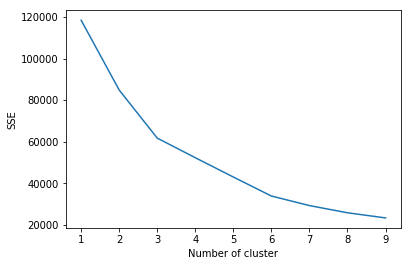

In [20]:
# elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(scaled_df)
    scaled_df["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.4764428841505431
For n_clusters = 3 The average silhouette_score is : 0.5193057745963306
For n_clusters = 4 The average silhouette_score is : 0.5232239151707317
For n_clusters = 5 The average silhouette_score is : 0.5314026655871217
For n_clusters = 6 The average silhouette_score is : 0.5413752076746261
For n_clusters = 7 The average silhouette_score is : 0.5051634892478776
For n_clusters = 8 The average silhouette_score is : 0.5136652277062949
For n_clusters = 9 The average silhouette_score is : 0.5143678039915047
For n_clusters = 10 The average silhouette_score is : 0.5163667954812617
For n_clusters = 11 The average silhouette_score is : 0.523986528786981
For n_clusters = 12 The average silhouette_score is : 0.5259840151087809
For n_clusters = 20 The average silhouette_score is : 0.44689323686452703
For n_clusters = 30 The average silhouette_score is : 0.37665992631

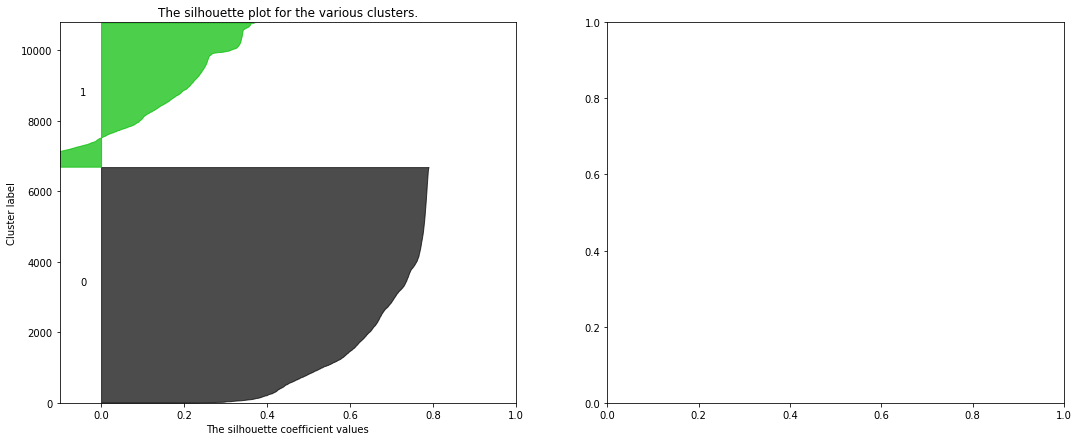

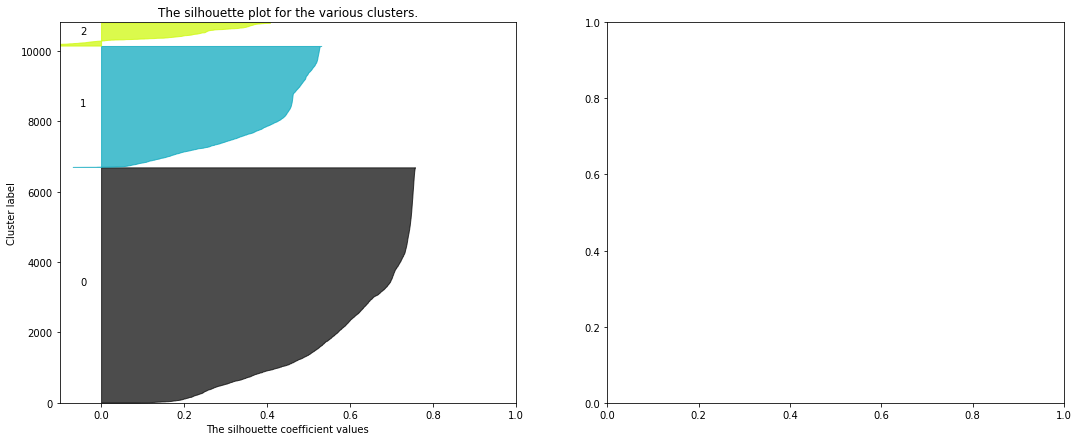

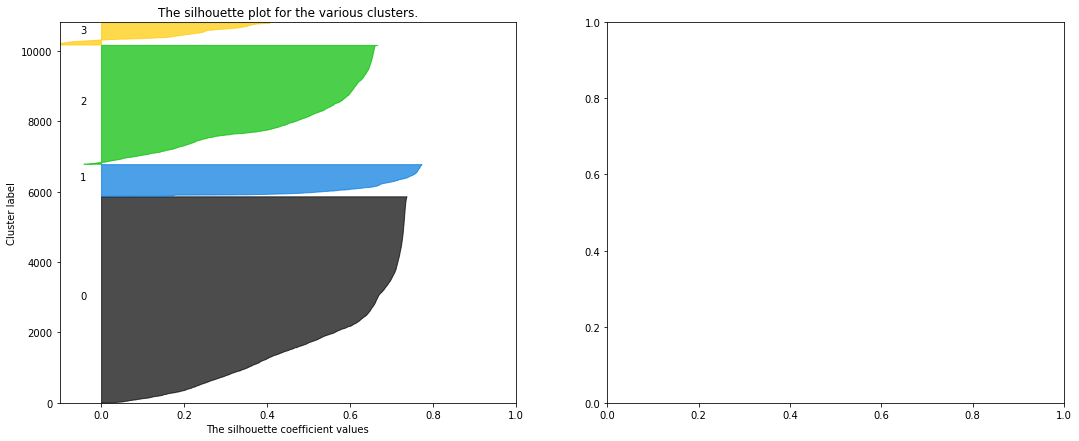

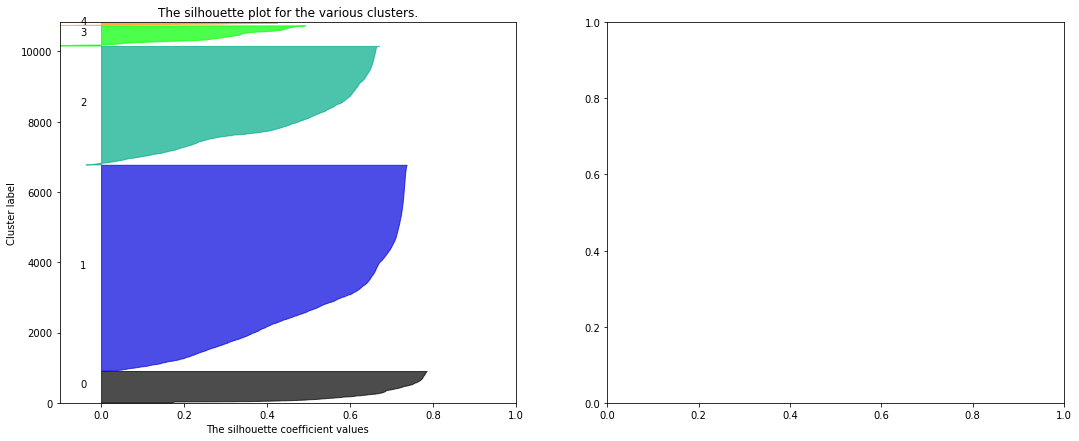

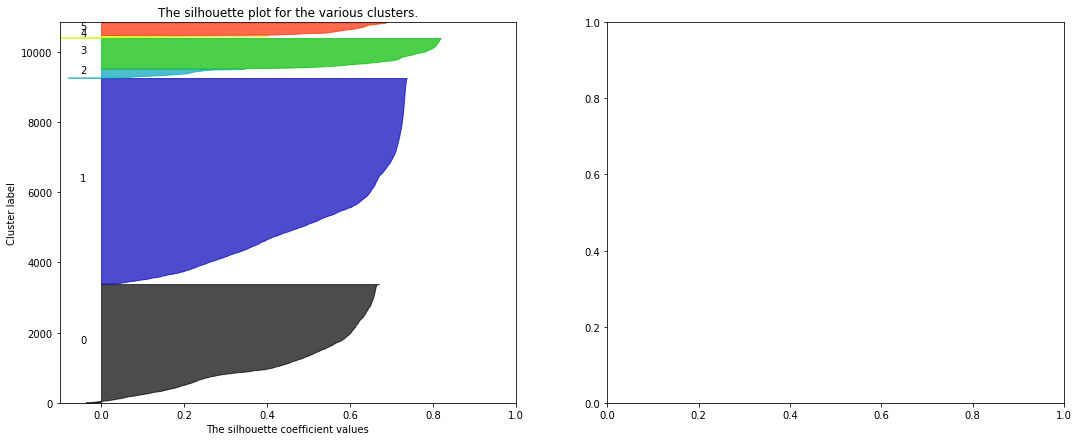

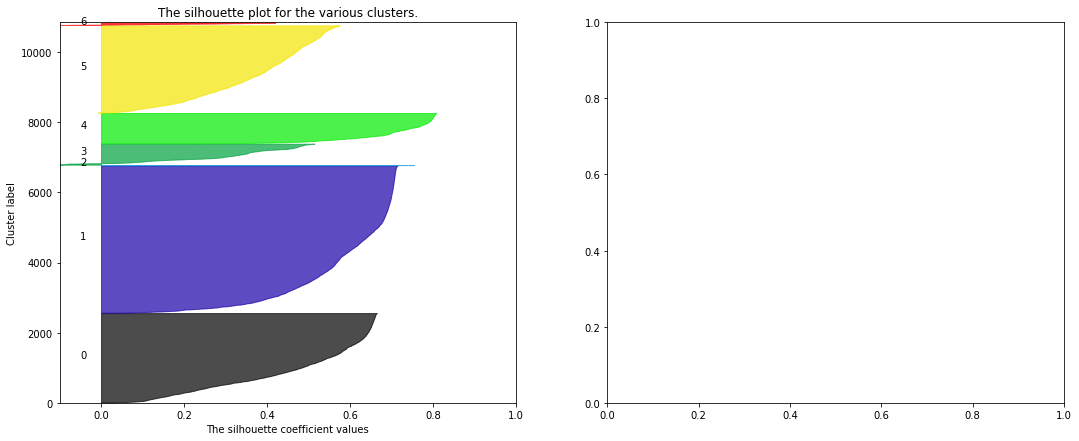

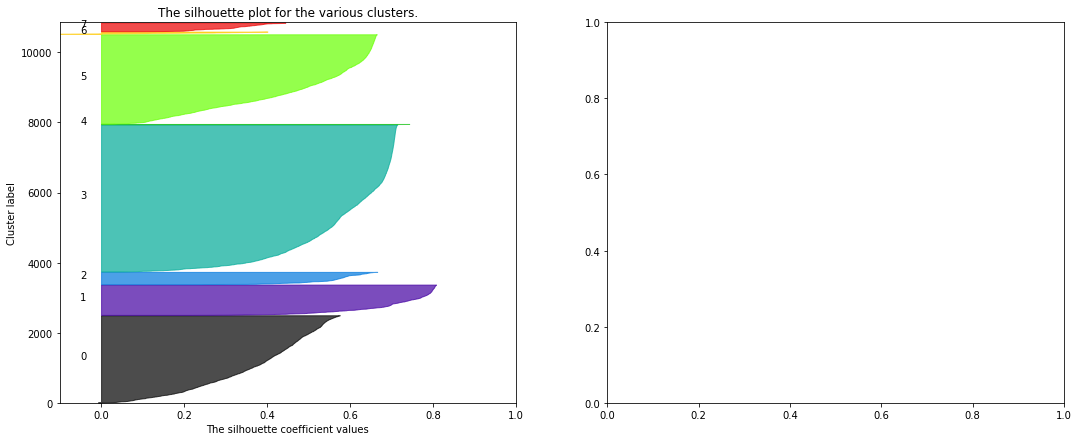

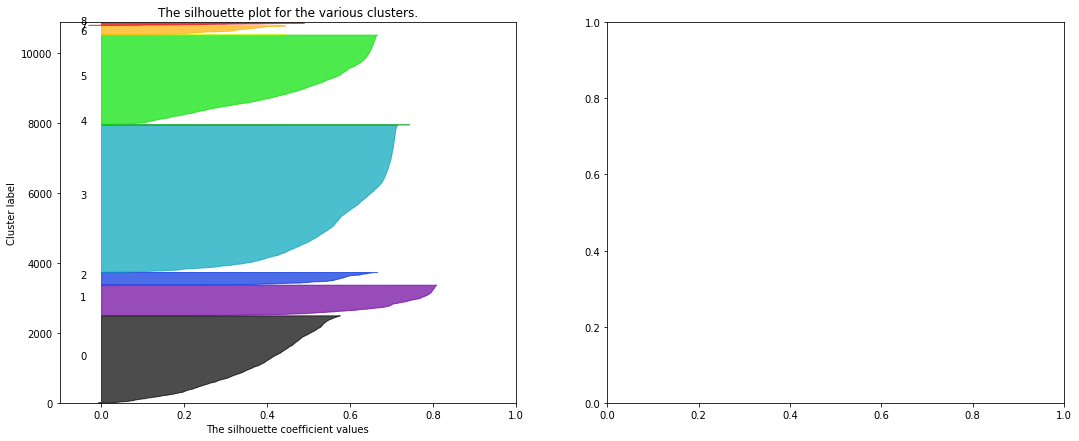

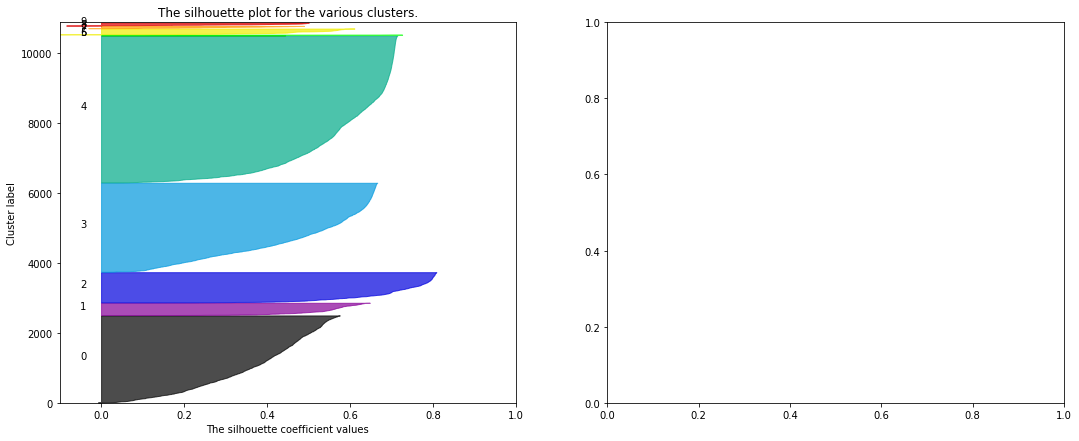

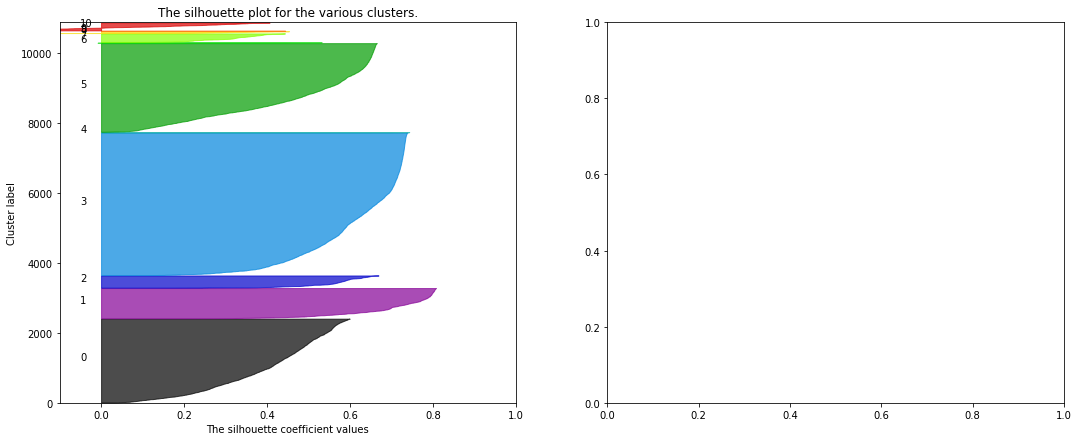

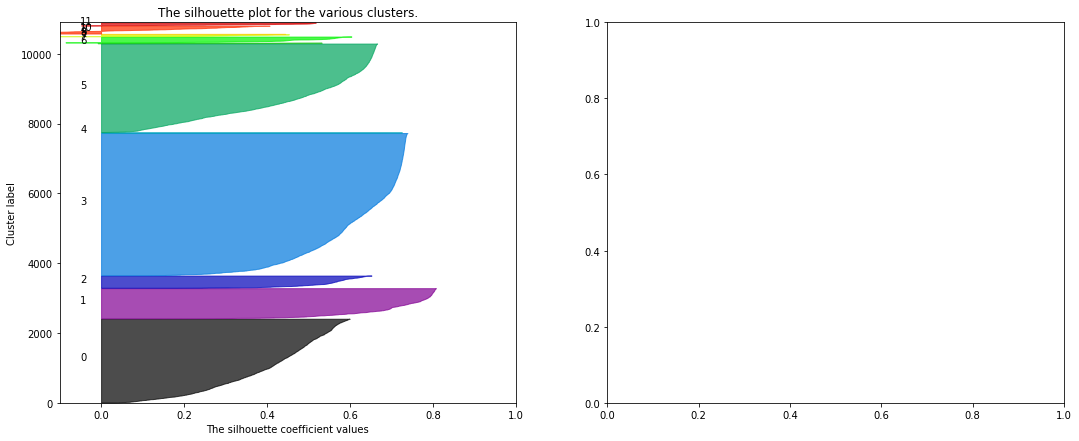

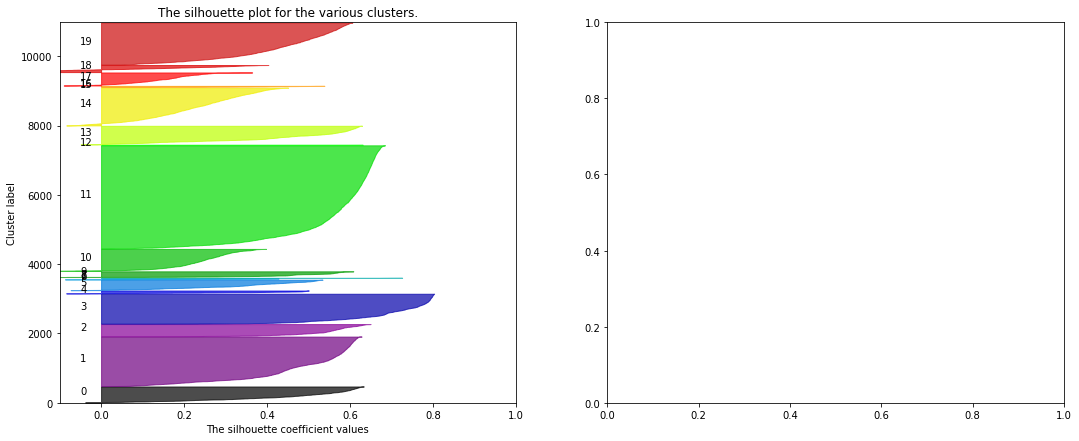

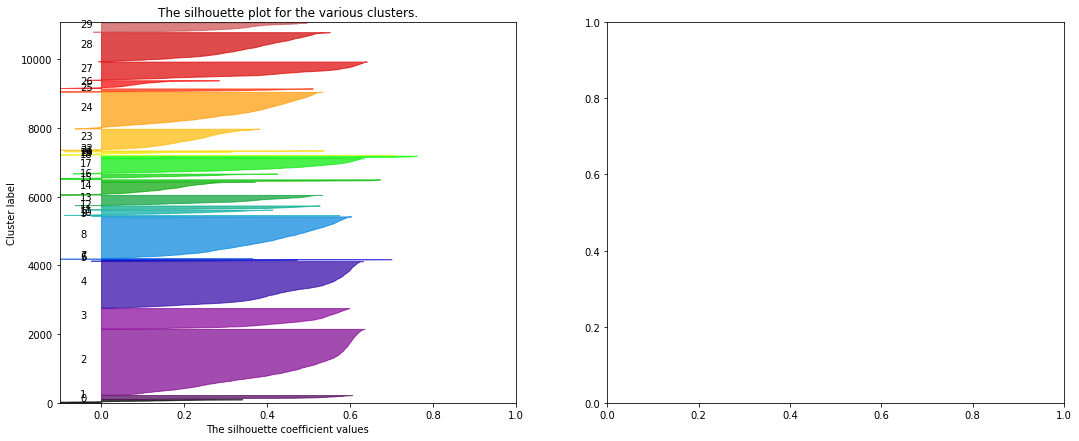

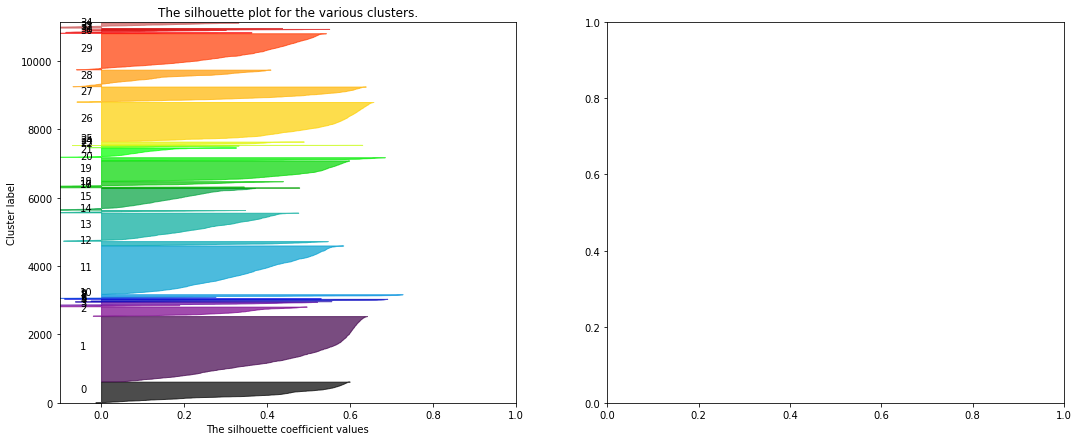

In [21]:
# silhouette method
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,20,30,35]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_df)
y_kmeans = kmeans.predict(scaled_df)

In [28]:
X['clusters']=y_kmeans
X['clusters'].value_counts()

1    5859
0    3373
3     897
2     566
5      67
4       8
Name: clusters, dtype: int64

In [38]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, scaled_df)
closest
centers = X.iloc[closest[:],:]

,sales_avg,num_transactions,tran_prod_sale_qty,Q2.x,Q3.x,Q4.x,discounted_transaction_p,Q2.y,Q3.y,Q4.y,discount_avg,clusters
1417,2116.97,758,1.207124,1.00,1.000,1.000,0.531662,0.000000,0.320619,0.407524,0.239805,0
1556,4067.46,2760,1.196739,1.00,1.000,1.000,0.159783,0.000000,0.000000,0.000000,0.042101,1
9270,2044.47,51,5.229706,3.12,3.774,5.136,0.274510,0.000000,0.111315,0.253242,0.122939,2
4995,1129.57,136,1.389706,1.00,1.000,1.250,0.691176,0.438636,0.500501,0.500501,0.439218,3
1919,980.95,126,24.285714,20.00,20.000,20.000,0.960317,0.500391,0.500391,0.500391,0.489476,4
8084,190577.59,98863,1.657506,1.00,1.000,2.000,0.451079,0.000000,0.000000,0.155039,0.085136,5
